# Exploratory Data Analysis
This lesson is going to walkthrough the diamonds dataset and illustrate some best practices for Exploratory Data Analysis (EDA). This notebook is based on the EDA chapter in the [R for Data Science](https://r4ds.had.co.nz/exploratory-data-analysis.html#questions) book by Hadley Wickham. I refer you to that chapter for full details - since that book only has examples in the R language, we've Pythonised them here for you.

## What is Exploratory Data Analysis?
Quote dumping from the chapter: 

```
(EDA is the process of using)... visualisation and transformation to explore your data in a systematic way ... EDA is an iterative cycle. You want to:

1. Generate questions about your data.

2. Search for answers by visualising, transforming, and modelling your data.

3, Use what you learn to refine your questions and/or generate new questions.

EDA is not a formal process with a strict set of rules. More than anything, EDA is a state of mind. During the initial phases of EDA you should feel free to investigate every idea that occurs to you. Some of these ideas will pan out, and some will be dead ends. As your exploration continues, you will home in on a few particularly productive areas that you’ll eventually write up and communicate to others.

EDA is an important part of any data analysis, even if the questions are handed to you on a platter, because you always need to investigate the quality of your data. Data cleaning is just one application of EDA: you ask questions about whether your data meets your expectations or not. To do data cleaning, you’ll need to deploy all the tools of EDA: visualisation, transformation, and modelling.

```


# Continuous vs Categorical Variables

A variable is categorical if it can only take one of a small set of values. E.g. Sex can only be Male or Female. 

A variable is continuous if it can take any of an infinite set of ordered values. E.g. Numerical values such as temperature or price. Note: this doesn't mean there aren't restrictions on the values. For instance, a price must be positive but among the positive numbers there is an infinite range it can take. There is an infinity of values between any 2 numbers!

# Generating Questions

The goal of EDA is to develop an understanding of the data. We do this by generating a large quantity of questions to ask about our data. As we answer our questions, new questions will arise which will be more particular and relevant to our dataset. As Hadley Wickham says:

```
There is no rule about which questions you should ask to guide your research. However, two types of questions will always be useful for making discoveries within your data. You can loosely word these questions as:

What type of variation occurs within my variables?

What type of covariation occurs between my variables?
```

# Variation
Variation is the tendency of the values of a variable to change from measurement to measurement.
Every variable has its own pattern of variation, which can reveal interesting information. The best way to understand that pattern is to visualise the distribution of the variable’s values.

In [127]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


plt.style.use('classic')
%matplotlib inline
sns.set()

In [128]:
# Read in Diamonds Data
diamonds = pd.read_csv("../data/diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# About the diamonds dataset
This dataset contains information about 53,940 round-cut diamonds. How do we know? Each row of data represents a different diamond and there are 53,940 rows of data.

There are 10 variables measuring various pieces of information about the diamonds.

There are 3 categorical variables: cut, color, & clarity. For example, there are 5 categories of diamond cuts with “Fair” being the lowest grade of cut to ideal being the highest grade.

There are 6 variables that are of numeric/ continuous structure: carat, depth, table, x, y, z

There is 1 variable that has an integer/ categorical structure: price

1. price:	price in US dollars	`$326-$18,823`
2. carat:	weight of the diamond	`0.2-5.01`
3. cut:	quality of the cut	`Fair, Good, Very Good, Premium, Ideal`
4. color:	diamond color	`J (worst) to D (best)`
5. clarity:	measurement of how clear the diamond is	`I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)`
6. x:	length in mm	`0-10.74`
7. y:	width in mm	`0-58.9`
8. z:	depth in mm	`0-31.8`
9. depth:	total depth percentage	`43-79`
10. table:	width of top of diamond relative to widest point	`43-95`


In [132]:
# Let's compute how many diamonds we have for each cut quality. For this, we can use the size method.
diamonds_count = diamonds.groupby(by = ['cut'], as_index=False).size()
diamonds_count = diamonds_count.rename(columns = {'size':'count'})
diamonds_count

,cut,count
0,Fair,1610
1,Good,4906
2,Ideal,21551
3,Premium,13791
4,Very Good,12082


<AxesSubplot:xlabel='cut', ylabel='count'>

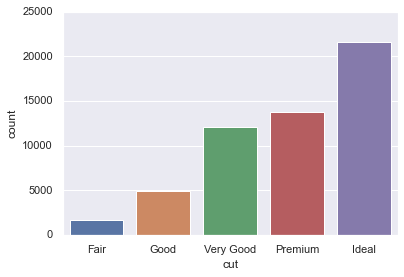

In [133]:
# For categorical variables, barplots can be a good way to get a sense of the data
sns.barplot(x = 'cut', y = 'count', data= diamonds_count, order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

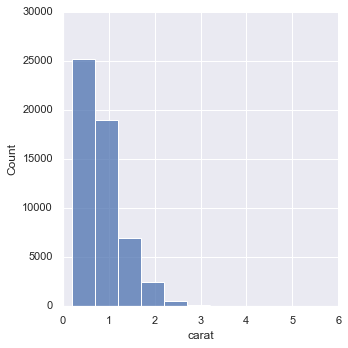

In [135]:
# Generate a historgram for carat types for diamonds
sns.displot(diamonds['carat'], binwidth = 0.5)

In [136]:
# Our plot looks streched because there are some diamonds with very high carats (outliers)
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

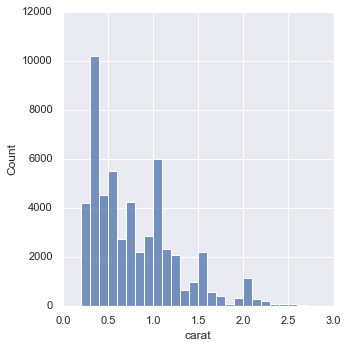

In [137]:
# Let's select diamonds with carat less than 3 (most of the data falls within that) and view the distribution
smaller = diamonds[diamonds.carat < 3]

sns.displot(smaller['carat'], binwidth = 0.1 )

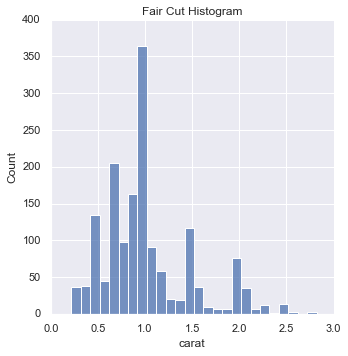

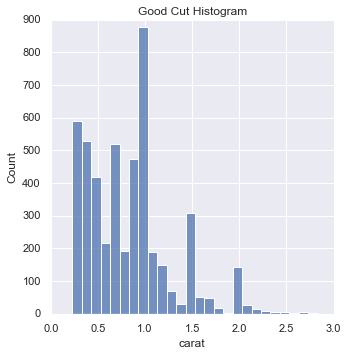

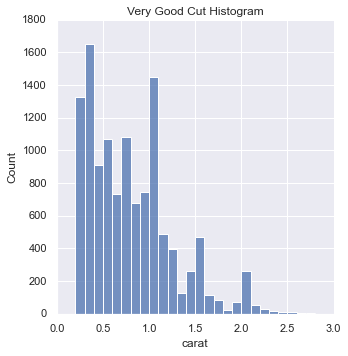

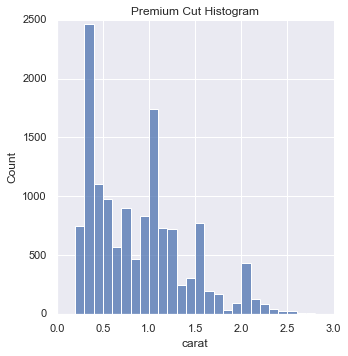

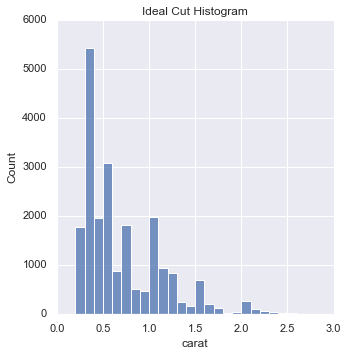

In [138]:
# Look at carat Histogram by diamond cut and each cut quality type
for key, value in enumerate(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']):
    smaller_cut = smaller[smaller.cut == value]
    sns.displot(smaller_cut['carat'], binwidth = 0.1)
    plt.title(value + ' Cut Histogram')

# Typical Values

General Questions
1. Which values are the most common? Why?

2. Which values are rare? Why? Does that match your expectations?

3. Can you see any unusual patterns? What might explain them?

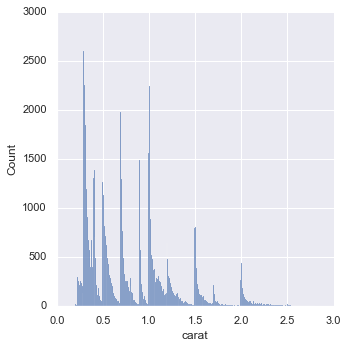

In [139]:
# Let's look at the histogram below for example
sns.displot(smaller['carat'], binwidth = 0.01)

We can ask questions like:

1. Why are there more diamonds at whole carats and common fractions of carats?

2. Why are there more diamonds slightly to the right of each peak than there are slightly to the left of each peak?

3. Why are there no diamonds bigger than 3 carats?

# Looking at Clusters Within your Data

Clusters of similar values suggest that subgroups exist in your data. To understand the subgroups, ask:

1. How are the observations within each cluster similar to each other?

2. How are the observations in separate clusters different from each other?

3. How can you explain or describe the clusters?

4. Why might the appearance of clusters be misleading?

The histogram below shows the length (in minutes) of 272 eruptions of the Old Faithful Geyser in Yellowstone National Park. Eruption times appear to be clustered into two groups: there are short eruptions (of around 2 minutes) and long eruptions (4-5 minutes), but little in between.

In [140]:
# Read in Data
faithful = pd.read_csv("../data/faithful.csv")
faithful

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


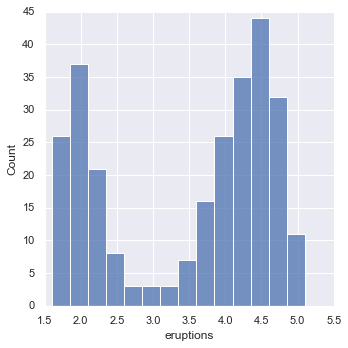

In [141]:
sns.displot(faithful['eruptions'], binwidth = 0.25)

# Extreme Values/ Outliers

Outliers are observations that are unusual; data points that don’t seem to fit the pattern. Sometimes outliers are data entry errors; other times outliers suggest important new science. When you have a lot of data, outliers are sometimes difficult to see in a histogram.

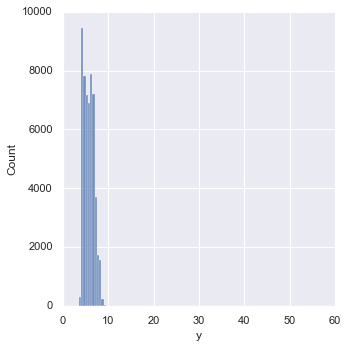

In [142]:
# Outliers are hard to see with a histogram - usually you can tell with the limits on the x-axis. The y variable is the width in mm for the diamond.
sns.displot(diamonds['y'], binwidth = 0.5)

In [143]:
# A better way is to look at the percentiles for the distribution
diamonds['y'].describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

In [144]:
## Alternatively, we can ask for custom percentiles
np.percentile(diamonds['y'], [0, 5, 25, 50, 75, 90, 95, 99])

array([0.  , 4.3 , 4.72, 5.71, 6.54, 7.3 , 7.65, 8.34])

In [145]:
# We see that there are unusual values like 0 and 58. We can look at this data more closely
filt_diamonds = diamonds[(diamonds.y < 3) | (diamonds.y > 20)].reset_index(drop = True)
filt_diamonds[['price', 'x', 'y', 'z']].sort_values(by = ['y'], ascending=True)

,price,x,y,z
0,5139,0.00,0.0,0.00
1,6381,0.00,0.0,0.00
3,12800,0.00,0.0,0.00
4,15686,0.00,0.0,0.00
5,18034,0.00,0.0,0.00
7,2130,0.00,0.0,0.00
8,2130,0.00,0.0,0.00
6,2075,5.15,31.8,5.12
2,12210,8.09,58.9,8.06


Since the y variable measures one of the 3 spatial dimensions of the diamonds, in mm, and we know diamonds can't have a width of 0mm. So these values must be incorrect. The measurements of 32mm and 59mm must also be implausible because they're massive diamonds but don't cost hundreds of thousands of dollars.

More advice from Hadley Wickham:
```
It’s good practice to repeat your analysis with and without the outliers. If they have minimal effect on the results, and you can’t figure out why they’re there, it’s reasonable to replace them with missing values, and move on. However, if they have a substantial effect on your results, you shouldn’t drop them without justification. You’ll need to figure out what caused them (e.g. a data entry error) and disclose that you removed them in your write-up.
```

# Missing Values
There are 2 options to dealing with unusual/ missing values in your dataset.
1. Remove those values and continue 
2. Replace unusual values with missing values

In [146]:
diamonds['new_y'] = np.select([diamonds.y < 3, diamonds.y > 20], [np.NaN, np.NaN], default =  diamonds.y)

<AxesSubplot:xlabel='x', ylabel='y'>

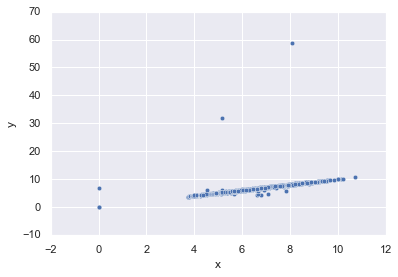

In [147]:
# Plot with unusual values
sns.scatterplot(x = 'x', y = 'y', data = diamonds)

<AxesSubplot:xlabel='x', ylabel='new_y'>

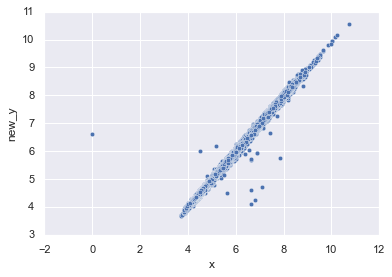

In [148]:
# Set unusual values as missing and then plot 
sns.scatterplot(x = 'x', y = 'new_y', data = diamonds)

Other times you want to understand what makes observations with missing values **different** to observations with recorded values. 

We're now going to look at the New York City flights data from 2013, it includes on-time data for all flights that departed NYC (i.e. JFK, LGA or EWR) in 2013.

For example, in the flights data, missing values in the `dep_time` (in the format HMM) variable indicate that the flight was cancelled. So you might want to compare the scheduled departure times for cancelled and non-cancelled times. You can do this by making a new variable by checking if it's `NaN`.

In [149]:
# Read Data
flights = pd.read_csv("../data/nyc_flights.csv")

flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [150]:
# Add a column to indicate when a flight is cancelled
flights['cancelled'] = np.where(flights.dep_time.isna(), True, False)
flights['sched_hour'] = flights.sched_dep_time // 100
flights['sched_min'] = flights.sched_dep_time % 100
flights['sched_dep_time'] = (flights.sched_hour + flights.sched_min)/ 60

flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,cancelled,sched_hour,sched_min
0,2013,1,1,517.0,0.333333,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,False,5,15
1,2013,1,1,533.0,0.566667,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,False,5,29
2,2013,1,1,542.0,0.750000,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,False,5,40
3,2013,1,1,544.0,0.833333,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,False,5,45
4,2013,1,1,554.0,0.100000,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,False,6,0


In [151]:
flights_grped = flights.groupby(by = ["sched_dep_time", "cancelled"], as_index = False).size()
flights_grped.columns = ['sched_dep_time', 'cancelled', 'count']
flights_grped

,sched_dep_time,cancelled,count
0,0.083333,False,340
1,0.083333,True,1
2,0.100000,False,6853
3,0.100000,True,164
4,0.116667,False,5069
...,...,...,...
150,1.333333,False,760
151,1.333333,True,35
152,1.350000,False,44
153,1.366667,False,816


<AxesSubplot:xlabel='sched_dep_time', ylabel='count'>

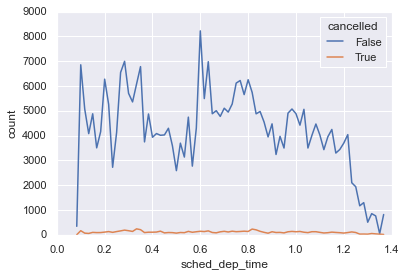

In [152]:
# It's hard to compare these lines because there are so many non-cancelled flights vs cancelled
sns.lineplot(x = "sched_dep_time", y = "count", hue = "cancelled", data = flights_grped)

# Covariation

If variation describes the behavior within a variable, covariation describes the behavior between variables. Covariation is the tendency for the values of two or more variables to vary together in a related way. 

Since we have categorical and continuous variable types, measuring covariation between them will require different methods.

## Categorical and Continuous Variables
We can use boxplots to visualise how distributions vary between categories. Looking at these can be very instructive.

<AxesSubplot:xlabel='cut', ylabel='price'>

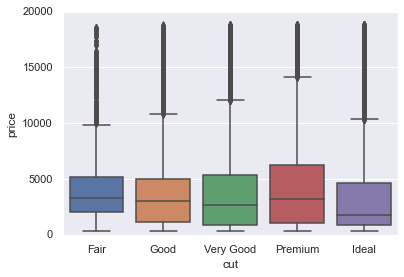

In [153]:
sns.boxplot(x = "cut", y = "price", data = diamonds, order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

The Boxplots show (surprisingly) that better quality diamonds are cheaper on average. Maybe you can look into this data and find out why?

# Two Categorical Variables
We can count frequencies between 2 categorical variables and visualise their relationships with heatmaps.

In [154]:
# A contingency table can be helpful here
diamonds_contingency_table = pd.crosstab(diamonds['cut'], diamonds['color'])
diamonds_contingency_table

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


In [155]:
diamonds_counts = diamonds.groupby(by = ['color', 'cut'], as_index=False).size()
diamonds_counts.head()

,color,cut,size
0,D,Fair,163
1,D,Good,662
2,D,Ideal,2834
3,D,Premium,1603
4,D,Very Good,1513


<AxesSubplot:xlabel='color', ylabel='cut'>

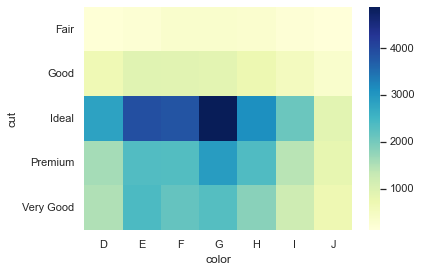

In [156]:
sns.heatmap(diamonds_contingency_table, cmap="YlGnBu")

In [158]:
from scipy.stats.contingency import association

print("cramers v: " + str(association(diamonds_contingency_table, method = 'cramer')) )
print("tschuprow: " + str(association(diamonds_contingency_table, method = 'tschuprow')) )
print("pearson: " + str(association(diamonds_contingency_table, method = 'pearson')) )

cramers v: 0.037924332663570634
tschuprow: 0.03426850298036871
pearson: 0.07563142278406255


# Two Continuous Variables
The best way to measure the relationship and associations between continuous variables is to use scatterplots.

<AxesSubplot:xlabel='carat', ylabel='price'>

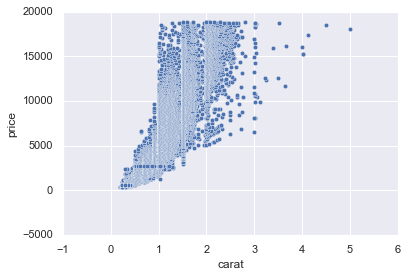

In [159]:
sns.scatterplot(x = "carat", y = "price", data = diamonds)

In [160]:
# Generate a correlation matrix
diamonds[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


# Patterns and Models

This is the first step towards machine learning. From Hadley Wickham

```
Patterns in your data provide clues about relationships. If a systematic relationship exists between two variables it will appear as a pattern in the data. If you spot a pattern, ask yourself:

Could this pattern be due to coincidence (i.e. random chance)?

How can you describe the relationship implied by the pattern?

How strong is the relationship implied by the pattern?

What other variables might affect the relationship?

Does the relationship change if you look at individual subgroups of the data?
```

Patterns reveal covariation. If you think of variation as a phenomenon that creates uncertainty, covariation is a phenomenon that reduces it. If two variables covary, you can use the values of one variable to make better predictions about the values of the second. If the covariation is due to a causal relationship (a special case), then you can use the value of one variable to control the value of the second.

Models are a tool for extracting patterns out of data. For example, consider the diamonds data. It’s hard to understand the relationship between cut and price, because cut and carat, and carat and price are tightly related. It’s possible to use a model to **remove** the very strong relationship between price and carat so we can explore the subtleties that remain. The following code fits a model that predicts price from carat and then computes the residuals (the difference between the predicted value and the actual value). The residuals give us a view of the price of the diamond, once the effect of carat has been removed.

In [161]:
import sys
!{sys.executable} -m pip install sklearn

You should consider upgrading via the '/Users/junaid/.virtualenvs/muslamic_makers_intro_data/bin/python -m pip install --upgrade pip' command.


In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
# Let's build a linear regression model
diamonds_train = diamonds[['carat', 'price', 'cut']].copy()
diamonds_train['log_carat'] = np.log(diamonds['carat'])
diamonds_train['log_price'] = np.log(diamonds['price'])

diamonds_train

,carat,price,cut,log_carat,log_price
0,0.23,326,Ideal,-1.469676,5.786897
1,0.21,326,Premium,-1.560648,5.786897
2,0.23,327,Good,-1.469676,5.789960
3,0.29,334,Premium,-1.237874,5.811141
4,0.31,335,Good,-1.171183,5.814131
...,...,...,...,...,...
53935,0.72,2757,Ideal,-0.328504,7.921898
53936,0.72,2757,Good,-0.328504,7.921898
53937,0.70,2757,Very Good,-0.356675,7.921898
53938,0.86,2757,Premium,-0.150823,7.921898


In [164]:
reg = LinearRegression().fit(np.array(diamonds_train.log_carat).reshape(-1, 1), diamonds_train.log_price)

In [165]:
# Compute exponential residuals. These are model errors, the difference between actual values and model predictions. We're removing the impact of carat in price and then we see how price differs by cut.
exp_residuals = np.exp(diamonds_train.log_price.values - reg.predict(np.array(diamonds_train.log_carat).reshape(-1, 1)) )

diamonds_train['resid'] = exp_residuals
diamonds_train

,carat,price,cut,log_carat,log_price,resid
0,0.23,326,Ideal,-1.469676,5.786897,0.819668
1,0.21,326,Premium,-1.560648,5.786897,0.954656
2,0.23,327,Good,-1.469676,5.789960,0.822182
3,0.29,334,Premium,-1.237874,5.811141,0.569459
4,0.31,335,Good,-1.171183,5.814131,0.510767
...,...,...,...,...,...,...
53935,0.72,2757,Ideal,-0.328504,7.921898,1.024035
53936,0.72,2757,Good,-0.328504,7.921898,1.024035
53937,0.70,2757,Very Good,-0.356675,7.921898,1.073538
53938,0.86,2757,Premium,-0.150823,7.921898,0.760324


<AxesSubplot:xlabel='cut', ylabel='resid'>

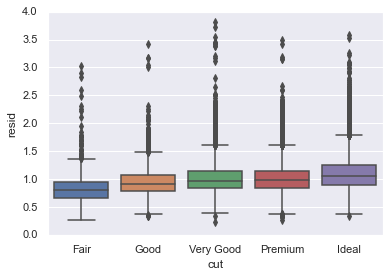

In [166]:
#  Once you’ve removed the strong relationship between carat and price, you can see what you expect in the relationship between cut and price: relative to their size, better quality diamonds are more expensive.
sns.boxplot(x = 'cut', y = 'resid', data = diamonds_train, order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

# EDA Checklist
These are some questions to ask yourself as you approach a new dataset. This list isn't exhaustive but can be a useful guide for you to ask your own questions.

1. How is my data distributed (Continuous Variables)? This is best discovered by looking at the quantiles of the distributions returned by the `describe` method.

2. What are the most frequent/ typical values in my dataset? Are these what I would expect to see?

3. What are the extreme values/ outliers in my data? What could be the reason these values are present? How many of them are there and does this change by variable? Does my analysis change much with or without these values?

4. Are there any missing values or incorrect values? What could be causing them?

5. Are there any natural groupings in my data? If so, how does my data differ between these groupings?

6. Of the key variables of interest in my data, what is the strength of associations between them?

7. Is my data properly scaled so I can compare like with like?

8. Could key variables in my dataset be systematically related? Could I model this relationship?